

<p align="center"><strong> MohammadAmin M. Shabestari </strong></p>
---

03/20/2025 

[LinkedIn Profile](https://www.linkedin.com/in/mohammadamin-shabestari) | [GitHub Profile](https://github.com/Msh8303)  
✉️ **Email:** shabestari8303p@gmail.com  

---


# 📊 **Dataset Analysis: Electrical Grid Stability Data**

## 📌 **Introduction**
The **Electrical Grid Stability** dataset contains real-time measurements from an electrical power grid, helping to analyze stability and potential failures. The dataset is widely used in **power system monitoring**, **fault detection**, and **grid stability forecasting**.

🔗 **Access the dataset here:** [Electrical Grid Stability Data](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data)

The dataset includes various electrical parameters that affect the stability of the grid, which we will analyze in this study.

---
## 🛠️ **Key Electrical Stability Factors**
Power grid stability is affected by multiple factors, including:

- **Voltage Fluctuations**
- **Frequency Deviations**
- **Active and Reactive Power Variations**
- **Load Demand and Generation Balance**

Each of these factors plays a critical role in determining the overall stability of the electrical grid.

🖼️ **Electrical Grid Components:**  
![Electrical Grid](https://i.pinimg.com/736x/8a/6c/1d/8a6c1d3dc5ccf5ac207bb0cab33184a7.jpg)

---
## 🔹 **Voltage Fluctuations**
Voltage stability refers to the ability of the power grid to maintain **constant voltage levels** under different load conditions.

### ⚠️ **Causes of Voltage Instability:**
- **Sudden load changes** in the grid
- **Transmission line faults** and disruptions
- **Insufficient reactive power compensation**
- **Generator overload and failures**

### 🔊 **Voltage Behavior in the Dataset:**
- Normal voltage levels range between **0.95 - 1.05 p.u.** (per unit).
- **High voltage fluctuations** can lead to equipment damage and failures.
- **Voltage collapse** occurs when reactive power is insufficient.

---
## 🔹 **Frequency Deviations**
Frequency stability refers to the ability of the grid to maintain the nominal frequency (**50 Hz or 60 Hz**) despite variations in power demand and supply.

### ⚠️ **Causes of Frequency Instability:**
- **Generator tripping or shutdown**
- **Load-generation imbalance**
- **Sudden changes in power demand**
- **Grid islanding events**

### 🔊 **Frequency Behavior in the Dataset:**
- The **nominal frequency is 50 Hz or 60 Hz**, depending on the grid.
- **Deviation beyond ±0.5 Hz** can indicate instability.
- **High frequency (above 60.5 Hz)** suggests over-generation.
- **Low frequency (below 49.5 Hz)** suggests under-generation.

---
## 🔹 **Active and Reactive Power Variations**
Power balance is essential for maintaining grid stability. The dataset contains:
- **Active Power (P):** Measures real power in MW (Megawatts)
- **Reactive Power (Q):** Measures reactive power in MVAR (Mega Volt-Amperes Reactive)

### ⚠️ **Causes of Power Instability:**
- **Load changes and demand surges**
- **Generator faults or disconnections**
- **Power factor issues affecting efficiency**
- **Voltage dips due to excessive reactive power demand**

### 🔊 **Power Behavior in the Dataset:**
- **Balanced active power** ensures proper supply-demand equilibrium.
- **Reactive power variations** affect voltage levels and power quality.
- **High active power losses** indicate inefficiency in the system.

---
## 🔹 **Load Demand and Generation Balance**
A stable grid requires an equal balance between power generation and demand. The dataset includes:

- **Load Demand:** The total power consumption by consumers.
- **Generation Output:** The power supplied by generators.

### ⚠️ **Causes of Load-Generation Imbalance:**
- **Sudden demand spikes** due to industrial or residential consumption
- **Unplanned generator outages** reducing supply
- **Intermittent renewable energy sources (solar, wind)** affecting supply stability
- **Grid congestion and transmission losses**

### 🔊 **Load-Generation Behavior in the Dataset:**
- **Stable grids maintain a balance** between demand and supply.
- **Over-generation leads to high frequency**, while **under-generation causes blackouts**.
- **Energy storage systems** help stabilize fluctuations.

---
## 📌 **Conclusion**
Understanding **electrical grid stability** is crucial for ensuring **reliable power distribution** and **fault prevention**. Each factor—**voltage fluctuations, frequency deviations, power variations, and load balance**—plays a critical role in maintaining grid reliability. By analyzing this dataset, we can enhance **predictive maintenance**, **fault detection**, and **grid optimization**.


---
## 🖥️ **Code Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from typing import Tuple, List, Union


### 📂 **Read Data**
- The Dataset was downloaded through the link mentioned before.

In [3]:
dataframe = pd.read_csv("Data_for_UCI_named.csv")
dataframe

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
dataframe['stabf'].value_counts(normalize= True)

stabf
unstable    0.638
stable      0.362
Name: proportion, dtype: float64

### 📌 **Important Data Keys:**

- **tau1, tau2, tau3, tau4 (Generator Reaction Times):** Reaction times of power generators (seconds).


- **p1, p2, p3, p4 (Nominal Power Consumption):** Power consumed by grid consumers.


- **g1, g2, g3, g4 (Price Elasticity Coefficients):** Elasticity of consumer demand with respect to price changes.


- **stab (Stability Measure):** Continuous measure of grid stability.


- **stabf (Stability Classification):** Binary classification indicating stable or unstable grid conditions.



---

### 📊 Feature Analysis with Plots

In this section, we analyze the distribution and relationships of different features using several plots.

- **1. Distribution Analysis**
The following histogram plots illustrate the distribution of different features:

    **Tau values (tau1 - tau4)**: The distribution of all tau variables appears similar, indicating a consistent pattern.

    **G values (g1 - g4)**: The distributions of all g variables are also similar.

    **P values (p1 - p4)**: Unlike the other variables, p1 follows a **normal distribution**, whereas p2, p3, and p4 exhibit different behaviors. This suggests that **p1 requires more attention as it might be a key factor in stability issues**.


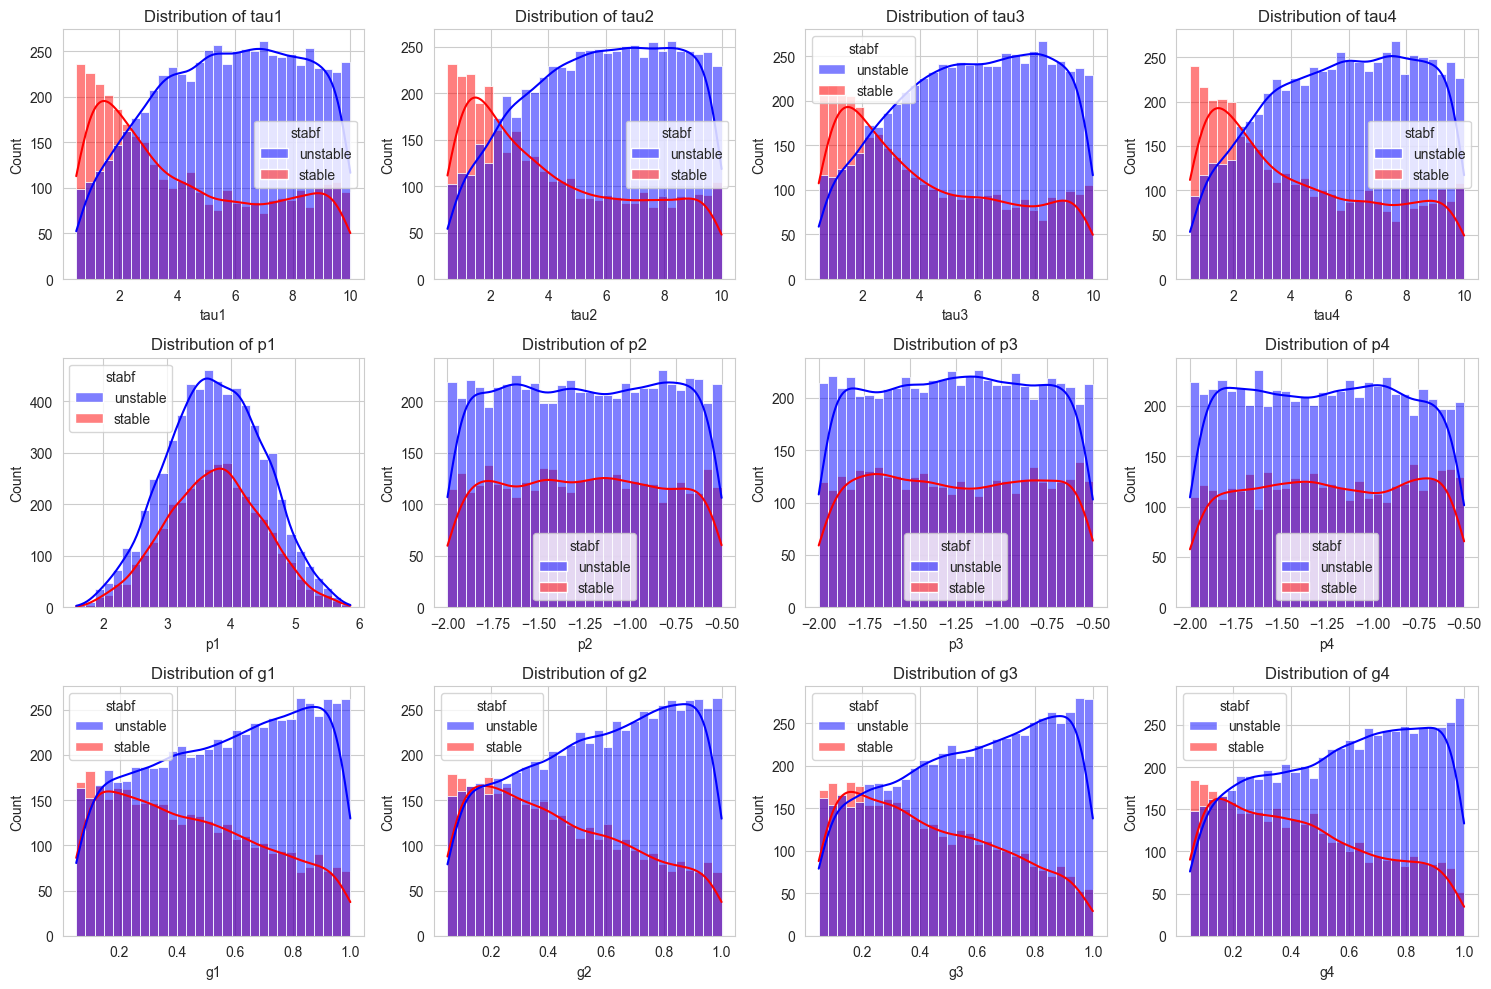

In [6]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, 4, figsize=(15, 10))
ax = ax.flatten()

for i , feature in enumerate(dataframe.columns[:-2]):
    sns.histplot(dataframe, x=feature, hue = 'stabf', kde = True, bins = 30,  ax=ax[i], palette=["blue", "red"])
    ax[i].set_title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

- **2. Boxplot Insights**

The boxplot visualization highlights:

**p1 contains outliers**, reinforcing the idea that it may have a significant impact on system stability.

Other features show relatively symmetrical distributions without extreme outliers.


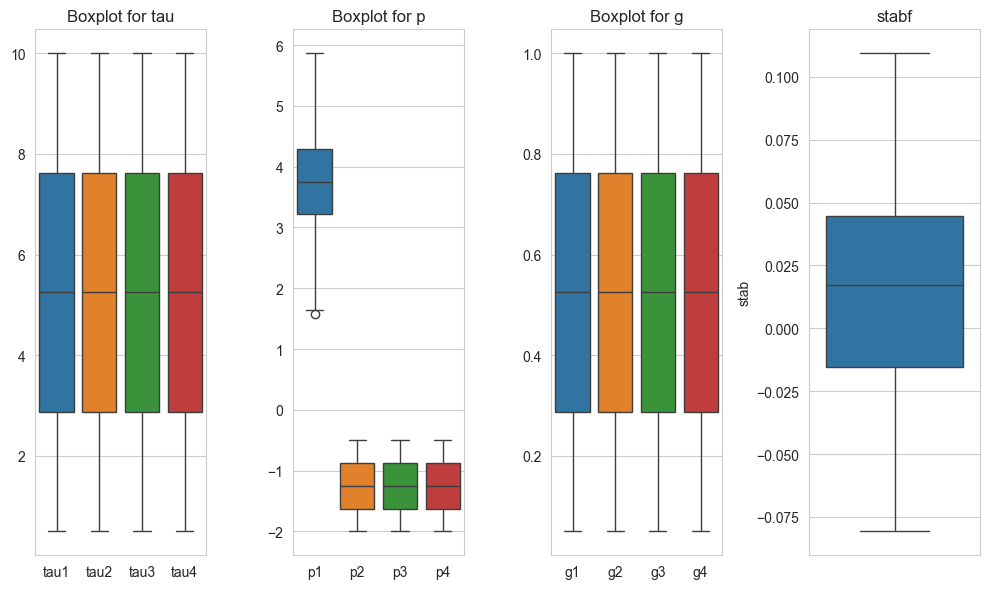

In [7]:
fig, ax = plt.subplots(1,4 , figsize=(10, 6))
ax = ax.flatten()

for i , feature in enumerate(['tau', 'p', 'g']):
    sns.boxplot(data=dataframe[[ feature + str(i+1) for i in range(4)]],  ax = ax[i] )
    ax[i].set_title(f"Boxplot for {feature}")
sns.boxplot(data=dataframe["stab"], ax=ax[3])
ax[3].set_title('stabf')
plt.tight_layout()
plt.show()

In [8]:
df_copy = dataframe.copy()

In [9]:
df_copy['stabf'] = dataframe['stabf'].map({'unstable':0, 'stable':1}) 

In [10]:
df_copy.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,0.480603
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,0.000000
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,0.000000
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,0.000000
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,1.000000
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403,1.000000


- **3. Feature Correlation Heatmap**
To further examine feature relationships, we encoded the "stable" and "unstable" states as numerical values (0 and 1) and plotted a heatmap:

    **p1 has a strong negative correlation with other p values (p2, p3, p4)**, meaning **as p1 increases, the other p values tend to decrease**. This inverse relationship suggests **p1 plays a critical role in system dynamics**.

    The **stability factor (stabf)** has a significant negative correlation with `stab`, reinforcing its importance in system classification.

    Some tau and g values show slight positive correlations with stability but are not as impactful as p1.


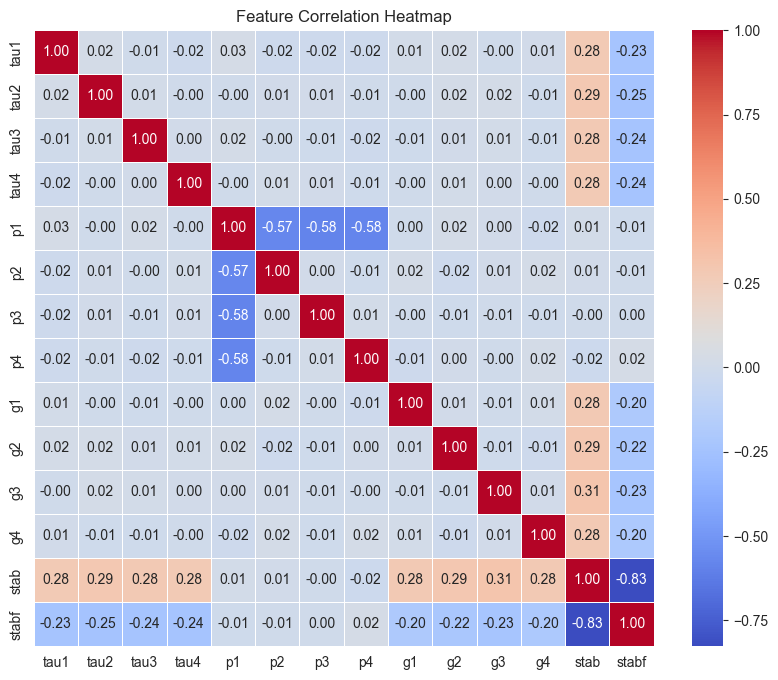

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df_copy[df_copy.columns].corr(), annot=True, cmap='coolwarm', fmt = '.2f', linewidths= 0.5 )
plt.title('Feature Correlation Heatmap')
plt.show()


###  Clip Outliers

In [12]:
def clip_outliers(df: pd.DataFrame, lower_bound: float = 0.01, higher_bound: float = 0.99) -> pd.DataFrame:
        """
    Clips outliers in a Pandas DataFrame by capping values based on quantile thresholds.

    Args:
        df (pd.DataFrame): The input DataFrame containing numerical values.
        lower_bound (float, optional): The lower quantile threshold (default is 0.01, i.e., 1st percentile).
        higher_bound (float, optional): The upper quantile threshold (default is 0.99, i.e., 99th percentile).

    Returns:
        pd.DataFrame: A DataFrame where all values are clipped between the calculated lower and upper quantiles.
        """
        
        lower_bounds = df.quantile(lower_bound)
        upper_bounds = df.quantile(higher_bound)
        return df.clip(lower = lower_bounds, upper = upper_bounds, axis=1)

df_new = clip_outliers(df_copy)

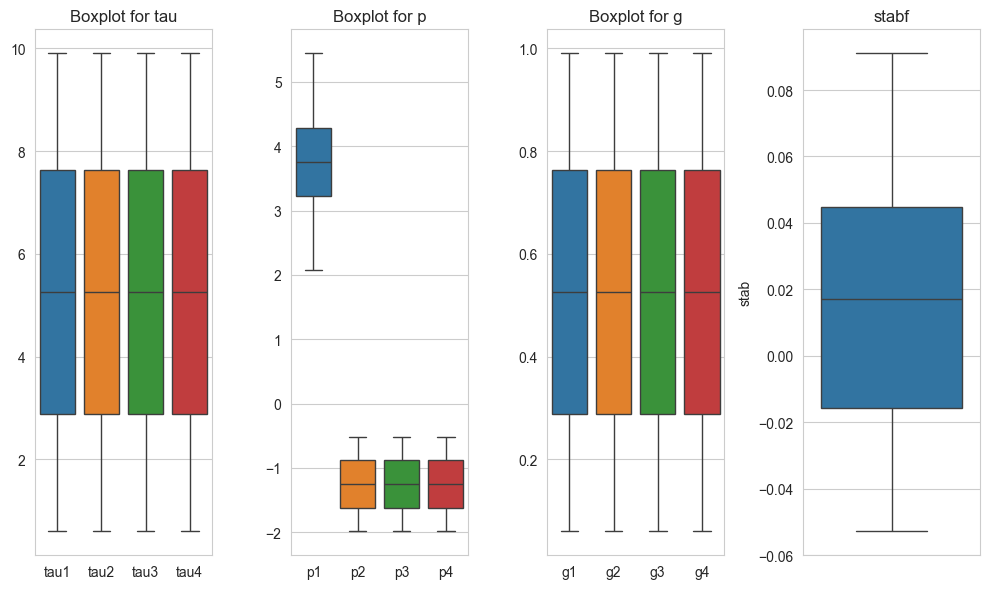

In [13]:
fig, ax = plt.subplots(1,4 , figsize=(10, 6))
ax = ax.flatten()

for i , feature in enumerate(['tau', 'p', 'g']):
    sns.boxplot(data = df_new[[ feature + str(i+1) for i in range(4)]],  ax = ax[i] )
    ax[i].set_title(f"Boxplot for {feature}")
sns.boxplot(data = df_new["stab"], ax=ax[3])
ax[3].set_title('stabf')
plt.tight_layout()
plt.show()

- **Before clipping, p1 had clear outliers**, which could have influenced system behavior.

- **After applying outlier clipping, p1 now exhibits without outliers**, without extreme values.


---

### 🔹 Scaling Values

In order to optimize the performance of **Multi-Layer Perceptrons (MLPs)**, it is essential to ensure that all features are scaled within a consistent range. MLPs typically perform best when input values are normalized to a small range, such as **[-1, 1]** or **[0, 1]**, as this helps in stabilizing training, improving convergence speed, and preventing issues related to differing feature magnitudes.

To achieve this, I applied **MinMaxScaler**, which transforms all feature values to the range **[0, 1]**. This scaling method preserves the relationships between data points while ensuring that no feature dominates due to its scale. 

By scaling the values using **MinMaxScaler**, we ensure that:
- The learning process remains stable and efficient.
- Gradient updates are more uniform, reducing the risk of vanishing or exploding gradients.
- The model can generalize better across different input distributions.

This preprocessing step is crucial in preparing the data for training MLP-based models effectively.


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns)

In [15]:
df_scaled

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.253890,0.266896,0.836386,0.986731,0.502253,0.817959,0.494978,0.178143,0.634767,0.859401,0.889361,0.965158,0.751842,0.0
1,0.935497,0.462686,0.263438,0.083101,0.889063,0.030527,0.076299,0.496588,0.380174,0.862447,0.539918,0.775798,0.325736,1.0
2,0.899790,0.886559,0.263324,0.066467,0.396139,0.528926,0.481496,0.724172,0.111204,0.759624,0.837798,0.054011,0.391269,0.0
3,0.012976,0.759928,0.418033,0.187437,0.561756,0.651371,0.031255,0.671868,0.415372,0.985255,0.934408,0.325647,0.567812,0.0
4,0.272694,0.753394,0.467139,0.994984,0.431909,0.584661,0.094511,0.973301,0.792296,0.425306,0.641760,0.817869,0.713704,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.250811,0.955222,0.191354,0.600742,0.377835,0.902692,0.364539,0.509348,0.582404,0.773538,0.809942,0.589552,0.533205,0.0
9996,0.300430,0.072995,0.253491,0.676691,0.676110,0.218564,0.702470,0.171116,0.475385,0.545388,0.243161,0.329302,0.187795,1.0
9997,0.189970,0.241346,0.878858,0.044378,0.661424,0.411053,0.708289,0.006504,0.460088,0.995740,0.096433,0.092824,0.146047,1.0
9998,0.970669,0.365134,0.232234,0.776233,0.132163,0.692968,0.908305,0.739127,0.328405,0.567210,0.891158,0.815148,0.629799,0.0


In [16]:
X = df_scaled[df_scaled.columns[:-2]]
y = df_scaled.stabf

### 🔹 Train, Validation, Test sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_tmp , y_train, y_tmp = train_test_split(X, y , test_size=0.3, random_state = 42)
X_val, X_test , y_val, y_test = train_test_split(X_tmp, y_tmp , test_size=0.4, random_state = 42)

In [18]:
print(f"Training samples: {X_train.shape}")
print(f"Validation samples: {X_val.shape}")
print(f"Test samples: {X_test.shape}")

Training samples: (7000, 12)
Validation samples: (1800, 12)
Test samples: (1200, 12)


---
### 🧠 **Neural Network Documentation**

- 📌 **Overview**:
    This document describes the design and implementation of a fully connected neural network with five hidden layers, implemented using PyTorch. The network is designed for binary classification tasks and utilizes techniques such as dropout regularization, ReLU activation functions, and early stopping to improve performance and prevent overfitting.

#### **Network Architecture**:
The neural network consists of:
   - **Input Layer**: Takes in the feature vector.
   - **Five Hidden Layers**: Each followed by a dropout layer to prevent overfitting.
   - **Output Layer**: Produces the final prediction.

---

- **1. Number of Hidden Layers**:
  
    Initially, the network was designed with three hidden layers, but through experimentation, five hidden layers were found to provide optimal performance. The number of neurons in each layer was selected based on empirical results.

- **2. Activation Function: ReLU**:
  
    The **Rectified Linear Unit (ReLU)** activation function is used after each hidden layer. ReLU is defined as:
  
    f(x) = max(0, x)
  
    ✅ **Advantages of using ReLU**:
    - Prevents vanishing gradients (which can occur with sigmoid or tanh activations).
    - Enables faster training by allowing the network to learn more complex patterns efficiently.

- **3. Dropout Regularization**:
  
    Dropout is used after each hidden layer with a dropout rate of 0.3. This technique randomly deactivates a fraction of neurons during training, which helps to:
    - ❌ Reduce overfitting.
    - ✅ Improve generalization to unseen data.
    - 🔄 Encourage the network to learn more robust representations.

- **4. Output Layer**:
  
    The output layer is a fully connected layer that directly maps the final hidden layer’s output to the number of required outputs (1 neuron for binary classification). Since **BCEWithLogitsLoss** (Binary Cross-Entropy with Logits) is used as the loss function, **sigmoid activation is not applied in the forward pass**. Instead, PyTorch's BCEWithLogitsLoss internally applies sigmoid activation before computing the loss.




The `network` class is implemented as follows:
- Uses `torch.nn.Module` as a base class.
- Includes five fully connected layers (`fc1` to `fc5`) followed by ReLU and dropout.
- The final output layer (`fc6`) does not apply any activation function.
- The `forward` method implements the forward pass through the network.


In [19]:

class network(nn.Module):
    """
    A fully connected neural network with five hidden layers and dropout regularization.

    Args:
        input_features (int): Number of input features.
        hidden_size(n) (int): Number of neurons in the (n)th hidden layer.
        output (int): Number of output neurons.
        dropout_rate (float, optional): Dropout rate to prevent overfitting (default is 0.3).

    Attributes:
        fc(n) (nn.Linear): (n)th fully connected layer.
        fc6 (nn.Linear): Output layer.
        dropout (nn.Dropout): Dropout layer applied after each hidden layer.

    Methods:
        forward(x: torch.Tensor) -> torch.Tensor:
            Performs a forward pass through the network.

    """
    
    def __init__(self, 
                 input_features: int, 
                 hidden_size1: int, 
                 hidden_size2: int, 
                 hidden_size3: int, 
                 hidden_size4: int, 
                 hidden_size5: int, 
                 output: int, 
                 dropout_rate: float = 0.3) -> None:
        
        super(network, self).__init__()
        
        self.fc1 = nn.Linear(input_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.fc5 = nn.Linear(hidden_size4, hidden_size5)
        self.fc6 = nn.Linear(hidden_size5, output)
        
        self.dropout = nn.Dropout(dropout_rate)
        
        
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of the network.

        Args:
            x (torch.Tensor): Input tensor with shape (batch_size, input_features).

        Returns:
            torch.Tensor: Output tensor with shape (batch_size, output).
        """
        
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        
        
        x = self.fc6(x)
        
        
        return x


🛑 **2. Early Stopping Mechanism (`earlystopping`)**
Early stopping is implemented to monitor validation loss and stop training if no improvement is observed over a predefined number of epochs (**patience = 5**).

🔄 **How It Works:**
- Tracks the best validation loss encountered.
- If validation loss improves, it resets the counter.
- If validation loss does not improve for a set number of epochs, training is stopped to prevent overfitting.


In [20]:
class earlystopping:
    """
    Implements early stopping to terminate training when validation loss stops improving.

    Args:
        patience (int, optional): Number of epochs to wait before stopping if no improvement in validation loss. 
                                  Default is 5.

    Attributes:
        patience (int): Number of epochs to wait before stopping.
        best_loss (float): Tracks the best (lowest) validation loss encountered.
        counter (int): Counts the number of consecutive epochs without improvement.

    Methods:
        __call__(val_loss: float) -> bool:
            Checks if validation loss has improved. If not, increments counter.
            Stops training if counter exceeds patience.
    """
    
    def __init__(self, patience: int = 5) -> None:
        self.patience = patience
        self.best_loss = float('inf')
        self.counter = 0
        
    def __call__(self, val_loss: float) -> bool:
        
        """Args:
            val_loss (float): Current validation loss.

        Returns:
            bool: True if early stopping should be triggered, otherwise False.
        """
        
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter  > self.patience:
                print("Early stopping has been trigerred")
                return True
        return False

📈 **3. Training Function (`train_model`)**  
The `train_model` function handles training and validation.

---

**Loss Function: BCEWithLogitsLoss**  
Binary Cross-Entropy with Logits is used as the loss function because the problem is a classification task. This function combines **sigmoid activation and binary cross-entropy** in one step for numerical stability.

BCEWithLogitsLoss(x, y) = - (y * log(sigmoid(x)) + (1 - y) * log(1 - sigmoid(x)))



---

🚀 **Optimizer: AdamW**  
The **AdamW optimizer** is chosen with a learning rate of **0.001** and weight decay of **1e-3**. AdamW helps:
- Improve generalization by decoupling weight decay from optimization.
- Reduce overfitting while maintaining efficient convergence.

---

📦 **Batch Training**
- Training data is divided into **mini-batches** for efficient training.
- Gradients are computed and updated using mini-batches instead of the entire dataset, reducing computational cost.

---

🎯 **Validation**
- The model is evaluated on a separate **validation dataset** after each epoch.
- If early stopping criteria are met, training is stopped.
- Loss values are recorded for both **training** and **validation** sets.

---

📊 **4. Training and Loss Visualization**  
At the end of training, a **loss curve** is plotted to analyze the model’s performance.


In [21]:
def train_model (model: nn.Module,
                 x_trainn: torch.Tensor,
                 y_trainn: torch.Tensor, 
                 x_validd: torch.Tensor, 
                 y_validd: torch.Tensor,
                 epochs: int, 
                 batch_size:int, 
                 lr: float = 0.001) -> Tuple[List[float], List[float]] :
    """
    Trains a neural network model using binary cross-entropy loss with logits.
    
    Args:
        model (nn.Module): The neural network model to be trained.
        x_trainn (torch.Tensor): Training data features.
        y_trainn (torch.Tensor): Training data labels.
        x_validd (torch.Tensor): Validation data features.
        y_validd (torch.Tensor): Validation data labels.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training and validation.
        lr (float, optional): Learning rate for the optimizer. Default is 0.001.
        
    Returns:
        Tuple[List[float], List[float]]: Lists containing training loss and validation loss per epoch.

    """
    
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-3)
    
    
    train_loss = []
    validd_loss = []
    
    
    Earlystopping = earlystopping(patience=15)
    
    train_dataset = TensorDataset(x_trainn, y_trainn)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    
    valid_dataset = TensorDataset(x_validd, y_validd)
    valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        
        
        for x_batch , y_batch in train_dataloader:
            optimizer.zero_grad()
            out = model(x_batch)
            loss = criterion(out, y_batch.view(-1,1))
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        
        average_loss = epoch_loss / len(train_dataloader)
        train_loss.append(average_loss)
        
        
        #validation
        model.eval()
        epoch_loss_vall = 0
        #forward pass
        with torch.no_grad():  
            for x_batch, y_batch in valid_dataloader: 
                validation_out = model(x_batch)
                val_loss = criterion(validation_out, y_batch.view(-1,1))
                epoch_loss_vall += val_loss.item()  
                
            average_val_loss = epoch_loss_vall / len(valid_dataloader)          
            validd_loss.append(average_val_loss)
        
        
        print(f'Train:  epoch {epoch + 1}/{epochs} - Loss: {average_loss: .2f} -------- Validation: epoch {epoch + 1}/{epochs} - Loss: {average_val_loss: .2f}')
        
       
        
        
        if Earlystopping(val_loss.item()):
            break
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(train_loss)), train_loss, label = 'Train loss')
    plt.plot(range(len(validd_loss)), validd_loss, label = 'Valid loss')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return train_loss, validd_loss
    

### 📜 Summary

| 🔹 **Component**     | 🔹 **Description** |
|----------------------|-------------------|
| **Hidden Layers** | 5 fully connected layers with ReLU activation |
| **Dropout**       | Applied after each hidden layer (rate = 0.3) |
| **Activation**     | ReLU (hidden layers), no activation in output layer |
| **Loss Function**  | BCEWithLogitsLoss (for binary classification) |
| **Optimizer**      | AdamW (with weight decay) |
| **Early Stopping** | Stops training when validation loss does not improve |
| **Training Method** | Mini-batch gradient descent with backpropagation |


---

### **Training model and Validate it**|

In [22]:

tensor_x_train = torch.Tensor(np.asarray(X_train)).float()
tensor_y_train = torch.Tensor(np.asarray(y_train)).float()
tensor_x_val = torch.Tensor(np.asarray(X_val)).float()
tensor_y_val = torch.Tensor(np.asarray(y_val)).float()


In [38]:
model = network(input_features= X_train.shape[1], hidden_size1=512, hidden_size2=256, hidden_size3=128, hidden_size4=64, hidden_size5=32, output=1)
model

network(
  (fc1): Linear(in_features=12, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (fc6): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Train:  epoch 1/500 - Loss:  0.49 -------- Validation: epoch 1/500 - Loss:  0.36
Train:  epoch 2/500 - Loss:  0.32 -------- Validation: epoch 2/500 - Loss:  0.25
Train:  epoch 3/500 - Loss:  0.25 -------- Validation: epoch 3/500 - Loss:  0.22
Train:  epoch 4/500 - Loss:  0.21 -------- Validation: epoch 4/500 - Loss:  0.20
Train:  epoch 5/500 - Loss:  0.20 -------- Validation: epoch 5/500 - Loss:  0.16
Train:  epoch 6/500 - Loss:  0.18 -------- Validation: epoch 6/500 - Loss:  0.14
Train:  epoch 7/500 - Loss:  0.16 -------- Validation: epoch 7/500 - Loss:  0.13
Train:  epoch 8/500 - Loss:  0.16 -------- Validation: epoch 8/500 - Loss:  0.13
Train:  epoch 9/500 - Loss:  0.15 -------- Validation: epoch 9/500 - Loss:  0.14
Train:  epoch 10/500 - Loss:  0.15 -------- Validation: epoch 10/500 - Loss:  0.11
Train:  epoch 11/500 - Loss:  0.14 -------- Validation: epoch 11/500 - Loss:  0.13
Train:  epoch 12/500 - Loss:  0.14 -------- Validation: epoch 12/500 - Loss:  0.12
Train:  epoch 13/500 -

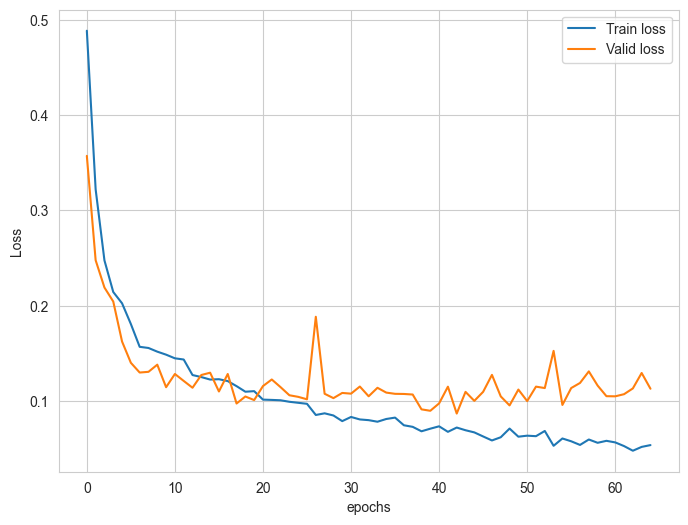

In [39]:
train_loss, val_loss = train_model(model, tensor_x_train, tensor_y_train, tensor_x_val, tensor_y_val, epochs=500, batch_size=32)


In [40]:
tensor_x_test = torch.Tensor(np.asarray(X_test)).float()
tensor_y_test = torch.Tensor(np.asarray(y_test)).float()

### **Testing Function (`test_model`)**:

The `test_model` function evaluates a trained neural network on a test dataset and provides key performance metrics along with a confusion matrix visualization.

**Model Evaluation:**  
   - Switches the model to **evaluation mode** (`model.eval()`) to disable dropout & batch normalization.
   - Moves the model to the specified **device** (`'cpu'` or `'cuda'`).
   - **Disables gradient computation** (`torch.no_grad()`) for efficiency.
   - Feeds **mini-batches** through the model.
   - Applies **sigmoid activation** to obtain probability scores.
   - Converts probabilities into binary class predictions using a **threshold of 0.5**.


**Compute Metrics:**  
   - Uses `sklearn` functions to compute:  
     ✅ **Accuracy** → Overall correctness.  
     ✅ **Precision** → Fraction of predicted positives that are correct.  
     ✅ **Recall** → Fraction of actual positives that are detected.  
     ✅ **F1-score** → Balance between precision & recall.

In [41]:
def test_model (model: nn.Module,
                x_test: torch.Tensor, 
                y_test: torch.Tensor, 
                device: Union[str, torch.device] = 'cpu') -> None:
    """
    Tests a trained neural network model on test data and evaluates its performance.

    Args:
        model (torch.nn.Module): Trained neural network model.
        x_test (torch.Tensor): Test dataset features.
        y_test (torch.Tensor): Test dataset labels.
        device (Union[str, torch.device], optional): Device to run the evaluation ('cpu' or 'cuda'). Defaults to 'cpu'.

    Returns:
        None: Prints evaluation metrics and displays a confusion matrix heatmap.
    """
    
    test_dataset = TensorDataset(x_test , y_test)
    test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle=False)
    
    true_labels = []
    predicted_labels = []
    
    model.eval()
    model.to(device)
    
    with torch.no_grad():
        for x_batch, y_batch in test_dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            
            output = model(x_batch)
            predictions = torch.sigmoid(output).cpu().numpy()
            predictions = (predictions > 0.5).astype(int)
            
            true_labels.extend(y_batch.cpu().numpy())
            predicted_labels.extend(predictions)
            
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='binary' )
    recall = recall_score(true_labels, predicted_labels, average='binary')
    f1 = f1_score(true_labels, predicted_labels, average='binary')
    
    
    print(f'Accuracy : {accuracy:.3f}\n')
    print(f'precision : {precision:.3f}\n')
    print(f'recall : {recall:.3f}\n')
    print(f'f1 : {f1:.3f}\n')
    
    
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True Lbels')
    plt.show()
    
    
    

Accuracy : 0.963

precision : 0.939

recall : 0.961

f1 : 0.950



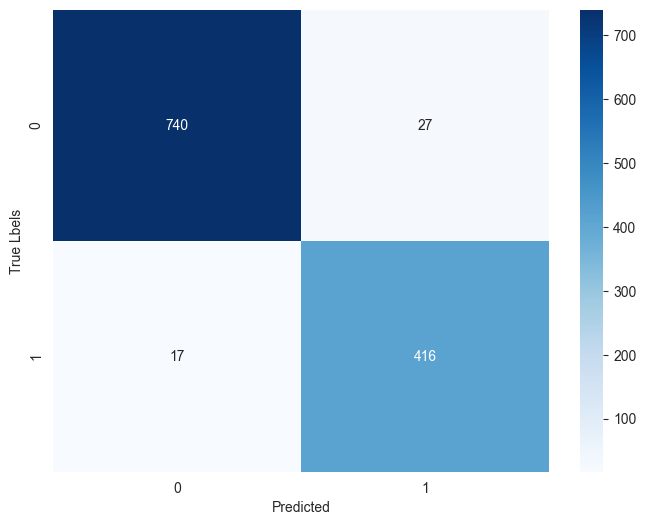

In [42]:
test_model(model, tensor_x_test, tensor_y_test)